# Линейные модели, SVM и деревья решений.
***
## 1. Описание задания.
1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите следующие модели:
    - одну из линейных моделей;
    - SVM;
    - дерево решений.
5. Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.

## 2. Выполнение работы.

#### Задание 1

Выберем датасет для выполения лабораторной работы. В данном датасете рассматриваются параметры вин, выращенных на разных винодельнях в одном регионе Италии.

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import *

wine = load_wine()
pd_wine = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])

#### Задание 2

In [2]:
pd_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [3]:
pd_wine.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

В данном датасете нет пропусков и категориальных признаков, поэтому приступаем к построению моделей.

Рассмотрим корреляцию признаков в датасете.

<AxesSubplot:>

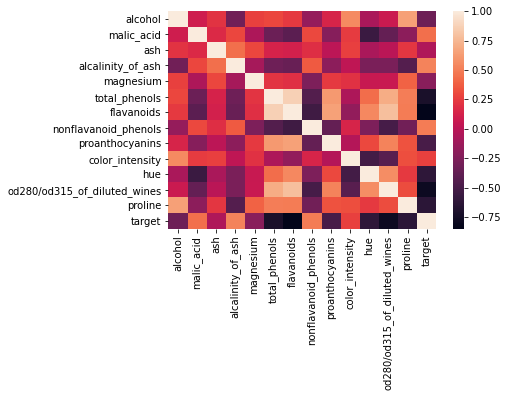

In [4]:
import seaborn as sns

sns.heatmap(pd_wine.corr())

Учитывая то, что malic_acid сильно коррелирует с hue, попробуем решить для них задачу регрессии.

На основе этого датаcета будем решать задачу классификации.

#### Задание 3

Используем метод train_test_split для получения обучающей и тестовой выборок.

In [5]:
from sklearn.model_selection import train_test_split
wine_X_train, wine_X_test, wine_Y_train, wine_Y_test = train_test_split(
    pd_wine['malic_acid'].values, pd_wine['hue'].values, test_size=0.5, random_state=1)

#### Задание 4

Приступим к обучению моделей.

##### 1) Линейная модель

In [6]:
from sklearn.linear_model import LinearRegression

# Обучим модель линейной регрессии
reg1 = LinearRegression().fit(wine_X_train.reshape(-1, 1), wine_Y_train.reshape(-1, 1))

Получив необходимые коэффициенты для линейного уравнения, построим график.

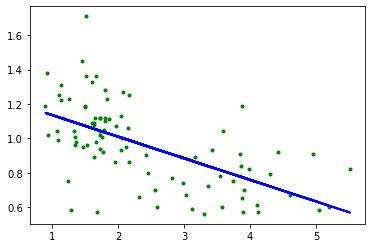

In [7]:
import matplotlib.pyplot as plt

y_array_regr = [reg1.coef_[0]*x+reg1.intercept_[0] for x in wine_X_train]

plt.plot(wine_X_train, wine_Y_train, 'g.')
plt.plot(wine_X_train, y_array_regr, 'b', linewidth=2.0)
plt.show()

При помощи полученной модели предскажем значения для тестовой выборки.

In [8]:
target1 = reg1.predict(wine_X_test.reshape(-1, 1))

Для оценки качества модели используем метрики Median abolute error и R^2

In [9]:
from sklearn.metrics import median_absolute_error, r2_score 

print("Median abolute error: {0}".format(median_absolute_error(wine_Y_test, target1)))
print("R^2: {0}".format(r2_score(wine_Y_test, target1)))

Median abolute error: 0.12977536670186574
R^2: 0.2436031620664526


##### 2) SVM - support vector machine

Данный метод позволяет разделить вектора (точки) в многомрном пространстве, принадлежащие разным классам, и образовать гиперплоскость, обеспечивающую максимальный зазор между векторами разных классов.

Так как ранее решалась задача регрессии, продолжим решать её, чтобы в конце исследования сравнить модели.

Median abolute error: 0.125786652996981
R^2: 0.24156567236381732


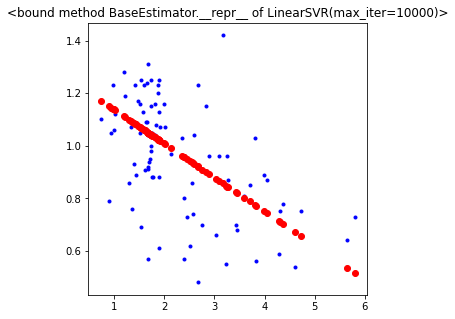

In [10]:
from sklearn.svm import LinearSVR, SVR

def plot_regr(clf):
    title = clf.__repr__
    clf.fit(wine_X_train.reshape(-1, 1), wine_Y_train)
    target2 = clf.predict(wine_X_test.reshape(-1, 1))
    
    print("Median abolute error: {0}".format(median_absolute_error(wine_Y_test, target2)))
    print("R^2: {0}".format(r2_score(wine_Y_test, target2)))
    
    fig, ax = plt.subplots(figsize=(5,5))
    ax.set_title(title)
    ax.plot(wine_X_test, wine_Y_test, 'b.')
    ax.plot(wine_X_test, target2, 'ro')
    plt.show()

plot_regr(LinearSVR(C=1.0, max_iter=10000))  

Median abolute error: 0.13340686765363385
R^2: 0.2045242215191807


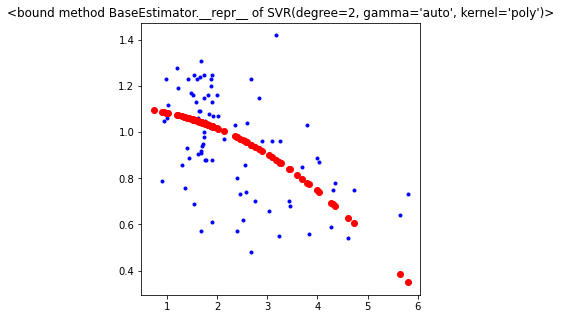

In [11]:
plot_regr(SVR(kernel='poly', degree=2, gamma='auto', C=1.0))

Median abolute error: 0.1372404547544116
R^2: 0.10939185580594735


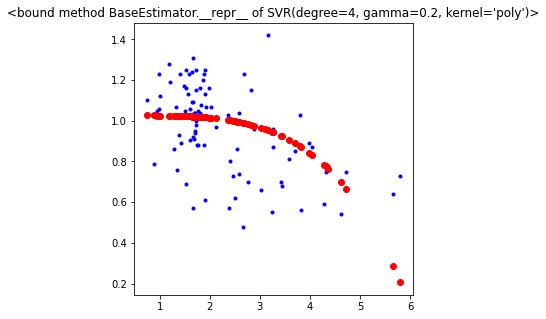

In [12]:
plot_regr(SVR(kernel='poly', degree=4, gamma=0.2, C=1.0))

Для оценки качества модели используем метрики Median abolute error и R^2. В результирующем справнении представим лучший резульатат из использованных.

##### 3) Древо решений

Дерево решений строит правила на основе обучающей выборки, которая заведомо не может содержать все знания о предметной области (неполная индукция).


Для определения глубины модели (гиперпараметра) воспользуемся GridSearchCV и кросс валидацию k-fold (5)

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

n_range = np.array(range(1, 12, 1))
tuned_parameters = [{'max_depth': n_range}]

regr3 = GridSearchCV(DecisionTreeRegressor(), tuned_parameters, cv=5, scoring = 'r2')
regr3.fit(wine_X_train.reshape(-1, 1), wine_Y_train.reshape(-1, 1))
target3 = regr3.predict(wine_X_test.reshape(-1, 1))

print("Наиболее подходящая глубина дерева: {0}".format(regr3.best_params_))
print("Значение метрики: {0}".format(regr3.best_score_))

Наиболее подходящая глубина дерева: {'max_depth': 1}
Значение метрики: 0.4009013673721359


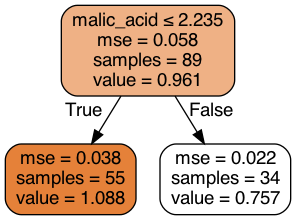

In [16]:
from io import StringIO 
from IPython.display import Image
import graphviz 
import pydotplus
from sklearn.tree import export_graphviz

def get_png_tree(tree_model_param, feature_names_param):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

Image(get_png_tree(DecisionTreeRegressor(max_depth=1).fit(wine_X_train.reshape(-1, 1), wine_Y_train.reshape(-1, 1)), pd.Index(['malic_acid'])), height='70%')

Для оценки качества модели используем метрики Median abolute error и R^2

In [15]:
print("Median abolute error: {0}".format(median_absolute_error(wine_Y_test, target3)))
print("R^2: {0}".format(r2_score(wine_Y_test, target3)))

Median abolute error: 0.11705882352941177
R^2: 0.23112135351605323


#### Вывод

По представленным метриками видим, что лучше себя показывали линейные модели (первая модель и линейная SVM). Для них результаты примерно одинаковые, но при использование SWM ошибка всё же меньше. Древо решений же показывает наилучший результат среди рассмотренных моделей. 